# Data Exploration
## EL5206  - Laboratorio de Inteligencia Computacional y Robótica
### Experiencia 4: Credit Risk
En este notebook se hace una exploración estadística inicial de los datos.


### Paso 1: Importar los datos con Pandas

In [1]:
# Importar librerías
import numpy as np
import pandas as pd

In [2]:
# Importar datos. Se importa un csv modificado para no separar las unidades de mil con comas
raw_data = pd.read_csv('CREDITRISK_FORMATED.csv', '\t')
# Observar el dataframe
raw_data.head()

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,Crédito_1,Crédito_2,Crédito_3,Crédito_4,Monto solicitado,Días de Mora,Monto Deuda Promedio,Número de meses inactivo,numero de cuotas,Aval,PAGA
0,1,F,463000.0,55.0,MED,CAS,27,226,CONCEPCION,0,-4030,0.0,292673,142.0,0,81,1,18,NO,PAGA
1,2,F,1200000.0,59.0,MED,CAS,121,226,CONCEPCION,0,0,27797549.0,0,16.0,0,34519,1,60,NO,NO PAGA
2,3,F,526000.0,49.0,TEC,SEP,59,88,SANTIAGO,0,750000,0.0,0,0.0,0,8016,0,14,NO,NO PAGA
3,4,M,1500000.0,47.0,UNV,SEP,138,1,ARICA,0,976444,0.0,0,13.0,10,25323,1,66,NO,PAGA
4,5,M,2600000.0,41.0,UNV,CAS,60,291,PUERTO MONTT,0,115440,0.0,4500000,7960.0,14,4566,3,77,SI,NO PAGA



Lo primero que se puede notar es que la columa 'ID' no es necesaria para este estudio, por lo que se debe retirar, y que la última columna corresponde a las predicciones, por lo que se debe separar del vector de características

In [3]:
# Eliminar primera columna ('ID')
raw_data = raw_data.drop(columns=['ID'])

raw_data.head()

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,Crédito_1,Crédito_2,Crédito_3,Crédito_4,Monto solicitado,Días de Mora,Monto Deuda Promedio,Número de meses inactivo,numero de cuotas,Aval,PAGA
0,F,463000.0,55.0,MED,CAS,27,226,CONCEPCION,0,-4030,0.0,292673,142.0,0,81,1,18,NO,PAGA
1,F,1200000.0,59.0,MED,CAS,121,226,CONCEPCION,0,0,27797549.0,0,16.0,0,34519,1,60,NO,NO PAGA
2,F,526000.0,49.0,TEC,SEP,59,88,SANTIAGO,0,750000,0.0,0,0.0,0,8016,0,14,NO,NO PAGA
3,M,1500000.0,47.0,UNV,SEP,138,1,ARICA,0,976444,0.0,0,13.0,10,25323,1,66,NO,PAGA
4,M,2600000.0,41.0,UNV,CAS,60,291,PUERTO MONTT,0,115440,0.0,4500000,7960.0,14,4566,3,77,SI,NO PAGA


### Paso 2: Limpieza general de los datos
Ahora se revisará si existen valores nulos o NaN en los datos, y en qué columnas se encuentran

In [4]:
# Revisar por columna si existen valores nulos o NaN
def revisar_nulos(df):
    for col in raw_data.columns:
        if df[col].isnull().values.any():
            print(col)
revisar_nulos(raw_data)

GENERO
RENTA
EDAD
NIV_EDUC
E_CIVIL
CIUDAD
Crédito_3
Monto solicitado
Aval


Podemos ver que existen varias columnas con datos faltantes. En particular nos importan las columnas que almacenen tipos de dato numérico que podrían ser de utilidad, como lo son 'RENTA', 'Crédito_3', y 'Monto solicitado', por lo que se investigará cuántos datos nulos existen en estas categorías 

In [5]:
# Revisar cuántos datos nulos existen
def cantidad_nulos(df, cols):
    for col in cols:
        print(col + ': ' + str(df[col].isnull().sum()))

cols = ['RENTA', 'EDAD', 'Crédito_3', 'Monto solicitado']
cantidad_nulos(raw_data, cols)

RENTA: 10
EDAD: 2
Crédito_3: 12
Monto solicitado: 6


Dado que no son muchos datos, se comenzará eliminando las filas de datos que no contengan renta, monto de crédito 3, o monto solicitado, dado que son indicadores importantes y no pueden ser reemplazados intuitivamente por algun valor genérico en caso de ser nulos. Además, como sólo son 2 datos sin edad, también se eliminarán

In [6]:
raw_data.dropna(subset=cols, inplace=True)
# Volver a revisar cuántas columnas con valores nulos hay
revisar_nulos(raw_data)

GENERO
NIV_EDUC
E_CIVIL
CIUDAD
Aval


### Paso 3: Procesar datos con strings
Ahora se procederá a transformar las columnas con datos en string a códigos enteros

In [7]:
# Obtener columnas con datos en strings
cols_numericas = raw_data._get_numeric_data().columns
cols_en_string = list(set(raw_data.columns) - set(cols_numericas))
for col in cols_en_string:
    # Imprimir las categorias de las columnas con datos en strings
    print(col + ': ' + str(raw_data[col].unique()))

COD_COM: ['226' '88' '1' '291' '300' '131' '108' '80' '119' '124' '67' '98' '313'
 '85' '100' '93' '89' '91' '16' '316' '11' '90' '184' '74' '5' '193' '116'
 ' ' '94' '122' '118' '253' '502' '128' '284' '86' '95' '106' '29' '115'
 '292' '110' '112' '504' '99' '105' '213' '272' '104' '35' '265' '138'
 '326' '109' '97' '279' '182' '87' '510' '82' '173' '13' '102' '53' '261'
 '70' '45' '59' '227' '31' '103' '84' '107' '55' '81' '83' '176' '66'
 '121' '63' '49' '92' '60' '22' '71' '27' '117' '79' '72' '294' '314'
 '135' '23' '228' '25' '516' '42' '148' '275' '77' '164' '167' '61' '301'
 '111' '127' '513' '242' '96' '113' '298' '101' '511' '146' '166' '126'
 '296' '287' '186']
NIV_EDUC: ['MED     ' 'TEC     ' 'UNV     ' '        ' 'EUN     ' 'BAS     ' nan]
E_CIVIL: ['CAS     ' 'SEP     ' 'SOL     ' 'VIU     ' nan]
PAGA: ['PAGA' 'NO PAGA']
CIUDAD: ['CONCEPCION      ' 'SANTIAGO        ' 'ARICA           '
 'PUERTO MONTT    ' 'CASTRO          ' 'RANCAGUA        '
 'CURACAVI        ' 'VINA DEL

In [8]:
# Crear listas con el ordenamiento deseado de las categorias
cat_educ = ['BAS     ', 'MED     ', 'TEC     ', 'EUN     ', 'UNV     ']
cat_aval = ['NO', 'SI']
cat_ciudad = np.delete(raw_data['CIUDAD'].unique(),[16, 50] , axis=0)
cat_genero = ['F       ', 'M       ']
cat_est_civil = ['SOL     ', 'CAS     ', 'SEP     ', 'VIU     ']
cat_paga = ['NO PAGA', 'PAGA']

categorias = [cat_educ, cat_aval, cat_ciudad, cat_genero, cat_est_civil, cat_paga]
cols = ['NIV_EDUC', 'Aval', 'CIUDAD', 'GENERO', 'E_CIVIL', 'PAGA'] 
i = 0
# Para cada categoria en strings, salvo el codigo de la comuna, reemplazar los strings por su codificación en
# números enteros
for col in cols:
    raw_data[col] = pd.Categorical(raw_data[col], categories=categorias[i]).codes
    i+=1
    
# Revisar columnas con valores nulos
revisar_nulos(raw_data)
# Convertir numeros en string a enteros
raw_data['COD_COM'] = pd.to_numeric(raw_data['COD_COM'], 'coerce')
# Mostrar parte del dataframe
raw_data.head()

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,Crédito_1,Crédito_2,Crédito_3,Crédito_4,Monto solicitado,Días de Mora,Monto Deuda Promedio,Número de meses inactivo,numero de cuotas,Aval,PAGA
0,0,463000.0,55.0,1,1,27,226.0,0,0,-4030,0.0,292673,142.0,0,81,1,18,0,1
1,0,1200000.0,59.0,1,1,121,226.0,0,0,0,27797549.0,0,16.0,0,34519,1,60,0,0
2,0,526000.0,49.0,2,2,59,88.0,1,0,750000,0.0,0,0.0,0,8016,0,14,0,0
3,1,1500000.0,47.0,4,2,138,1.0,2,0,976444,0.0,0,13.0,10,25323,1,66,0,1
4,1,2600000.0,41.0,4,1,60,291.0,3,0,115440,0.0,4500000,7960.0,14,4566,3,77,1,0


In [9]:
# Guardar dataframe preprocesado a .csv
raw_data.to_csv('CREDITRISK_PREPROCESSED.csv', index=False)

### Paso 4: Análisis Estadístico
Ahora se realizará un análisis estadístico de los datos para comprender la relevancia de cada indicador

In [10]:
# raw_data = pd.read_csv('CREDITRISK_PREPROCESSED.csv')
labels = raw_data['PAGA'].values
features = raw_data.iloc[:, :-1].values
print(len(features))

2264


Podemos notar que disponemos de un total de 2264 datos

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set_context("notebook", 2)

Primero que todo, se probará la relevancia del género en el pago o no pago del crédito. Para eso, se graficará un histograma para visualizar cuánto porcentaje de las mujeres paga su crédito versus cuánto porcentaje de los hombres lo hace

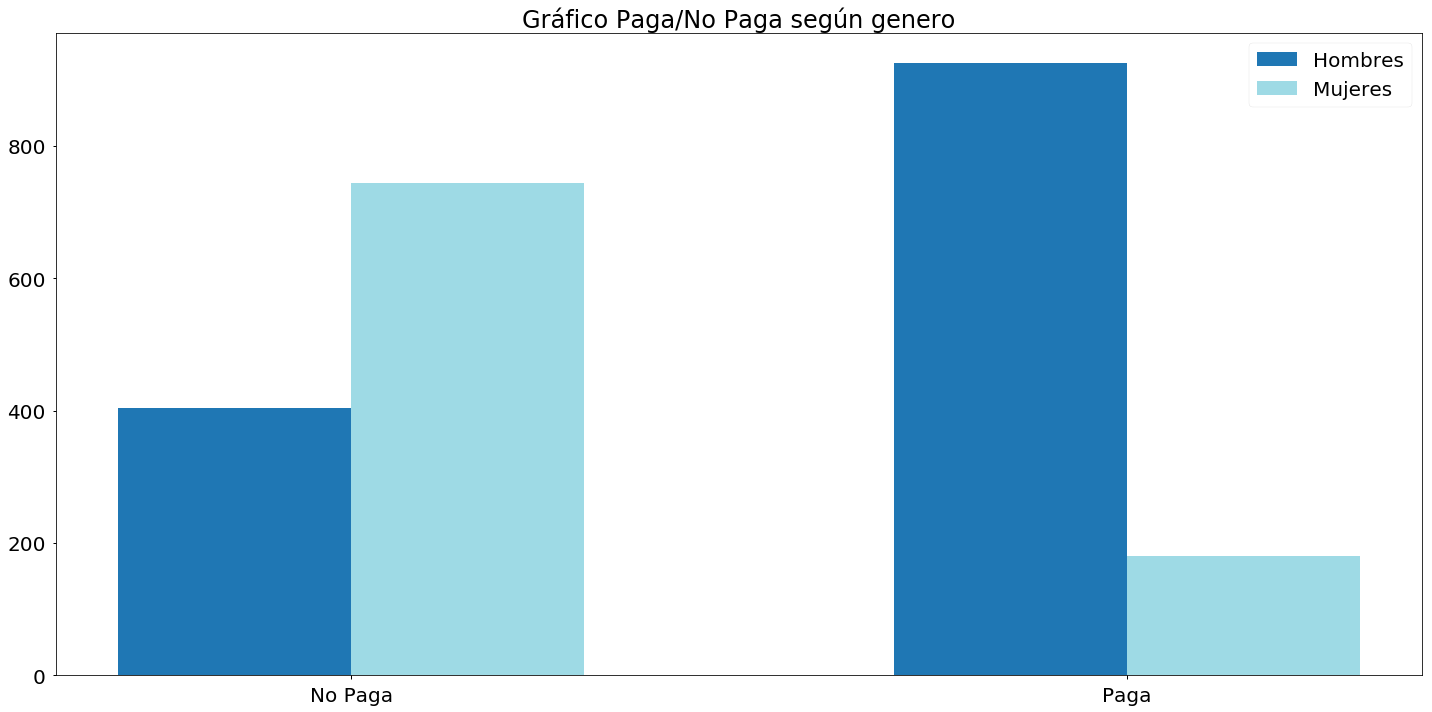

In [12]:
# Genero
genero = features[:,0]

# Obtener labels para cada categoria
paga_hombre = labels[genero==1]
paga_mujer = labels[genero==0]

# Contar cuántos pagan y no pagan, para cada categoría
unique, counts_hombre = np.unique(paga_hombre, return_counts=True)
unique, counts_mujer = np.unique(paga_mujer, return_counts=True)

# Graficar resultados
def graficar_categorico(categorias_x, n_barras, counts, labels, title, ticks_x, bar_width=0.3, legend=True):
    plt.figure(figsize=(20,10))
    c = cm.tab20(np.linspace(0, 1, n_barras))
    for i in range(n_barras):
        plt.bar(np.arange(categorias_x)+bar_width*i, counts[i], bar_width, color=c[i], label=labels[i])

    plt.title(title)
    plt.xticks(np.arange(2) + bar_width / 2, ticks_x)
    if legend:
        plt.legend()

    plt.tight_layout()
    plt.show()
    
graficar_categorico(2, 2, [counts_hombre, counts_mujer], ['Hombres', 'Mujeres'],
                    "Gráfico Paga/No Paga según genero", ('No Paga', 'Paga'))

Lo cual nos indica que este indicador por sí sólo muestra ciertas tendencias que podrian ayudar a obtener una predicción, por lo que sí es relevante.

A continuación, se repetirá el procedimiento para el resto de las variables categóricas

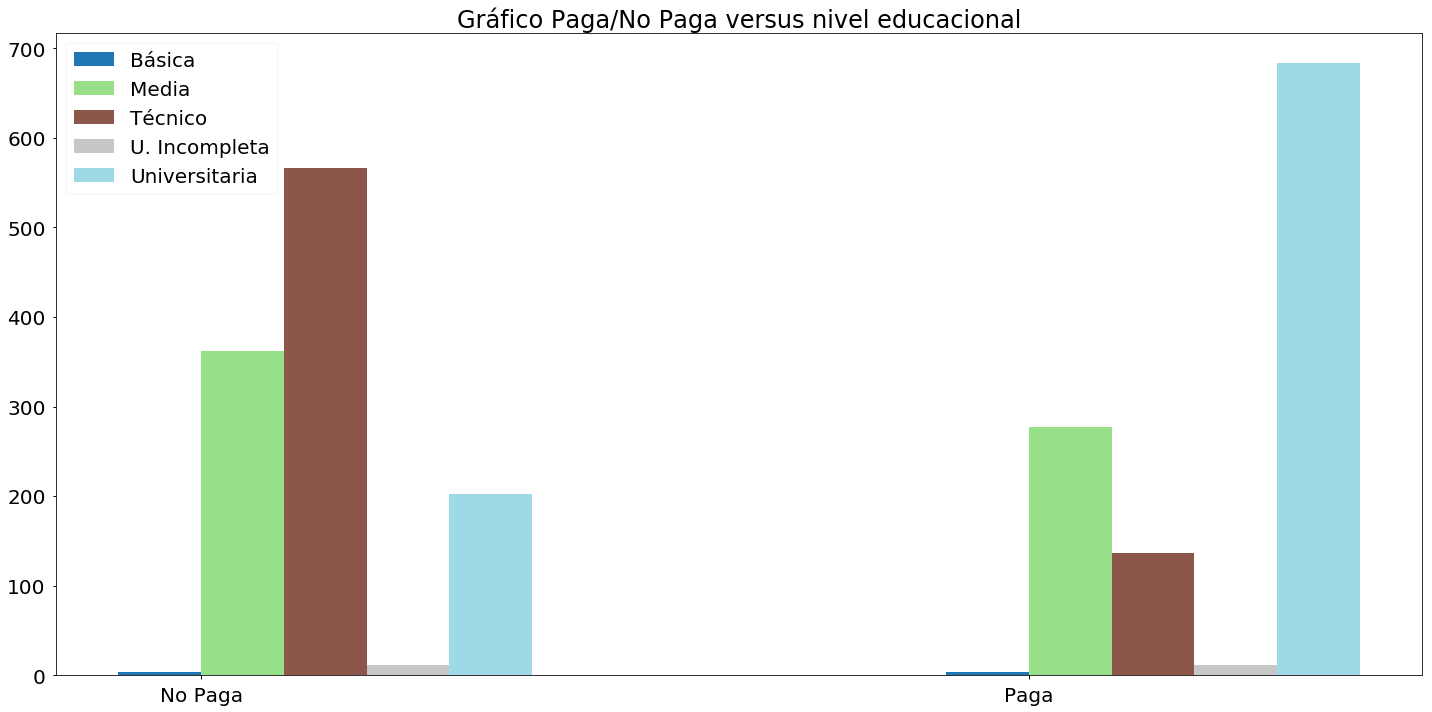

In [13]:
# Nivel educacional
niv_educ = features[:, 3]
counts = [0,0,0,0,0]
for i in range(5):
    unique, counts[i] = np.unique(labels[niv_educ==i], return_counts=True)
graficar_categorico(2, 5, counts, ['Básica', 'Media', 'Técnico', 'U. Incompleta', 'Universitaria'], 
                   "Gráfico Paga/No Paga versus nivel educacional", ('No Paga', 'Paga'), 0.1)

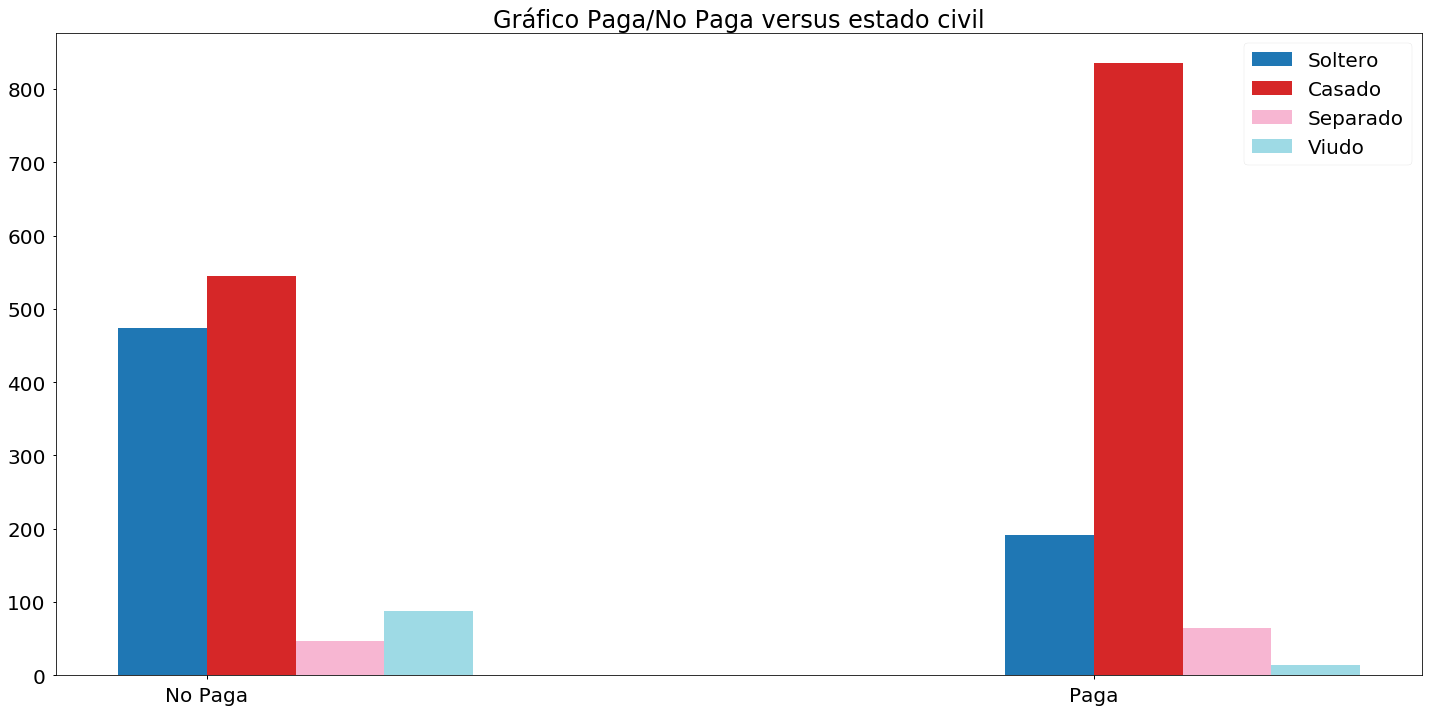

In [14]:
# Estado civil
est_civil = features[:, 4]
counts = [0,0,0,0]
for i in range(4):
    unique, counts[i] = np.unique(labels[est_civil==i], return_counts=True)
graficar_categorico(2, 4, counts, ['Soltero', 'Casado', 'Separado', 'Viudo'], 
                   "Gráfico Paga/No Paga versus estado civil", ('No Paga', 'Paga'), 0.1)

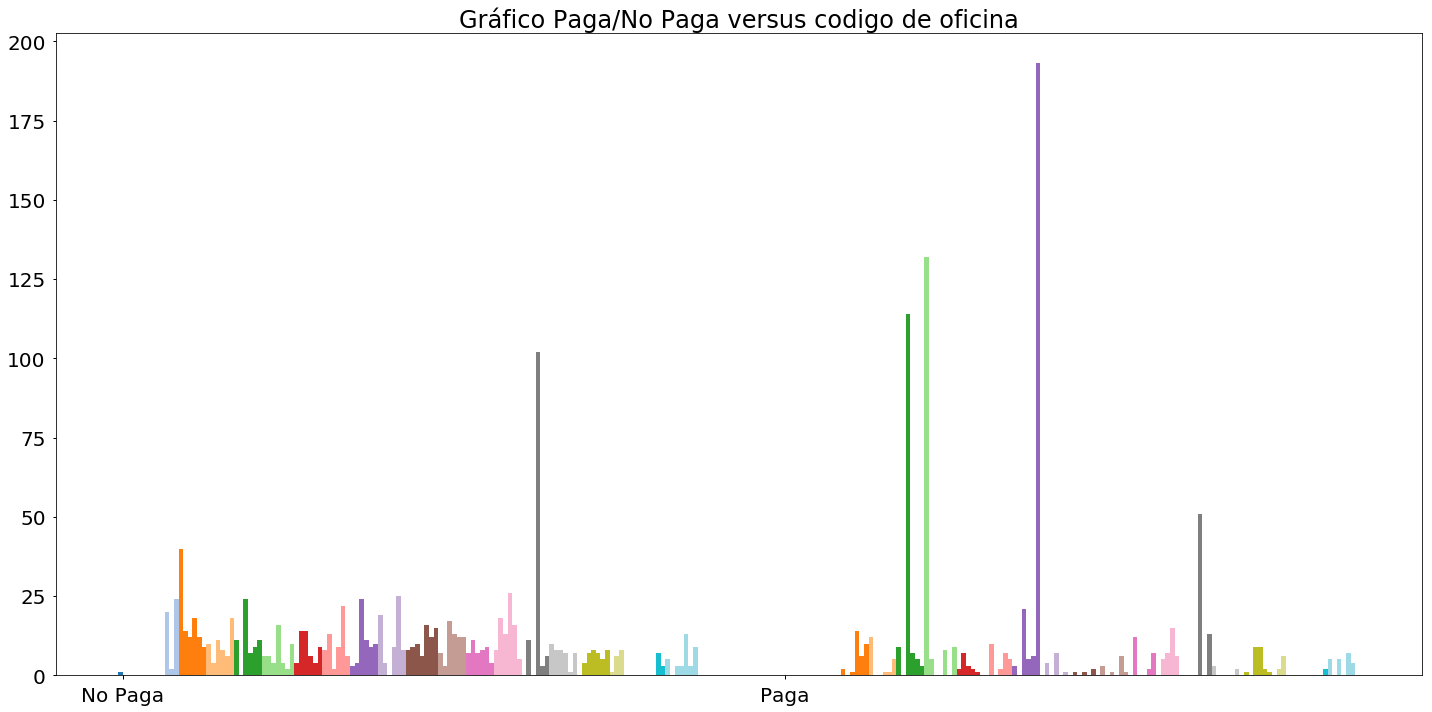

In [15]:
# Codigo de oficina
cod_ofi = features[:, 5]
counts = [0]*len(np.unique(cod_ofi))

# No necesitamos labels en este caso (muchas clases)
plot_labels = ['']*len(np.unique(cod_ofi))

for i in range(len(np.unique(cod_ofi))):
    plot_labels[i] = str(np.unique(cod_ofi)[i])
    unique, aux_counts = np.unique(labels[cod_ofi==i], return_counts=True)
    # Algunas categorias resultaban vacias, estas líneas reemplazan los espacios vacíos por ceros, para que
    # matplotlib los pueda reconocer correctamente
    if len(aux_counts) < 2:
        aux_counts = np.append(aux_counts, [0], axis=0)
        if len(aux_counts) < 2:
            aux_counts = np.append(aux_counts, [0], axis=0)
    
    counts[i] = aux_counts

graficar_categorico(2, len(np.unique(cod_ofi)), counts, plot_labels, 
                   "Gráfico Paga/No Paga versus codigo de oficina", ('No Paga', 'Paga'), 0.007, legend=False)

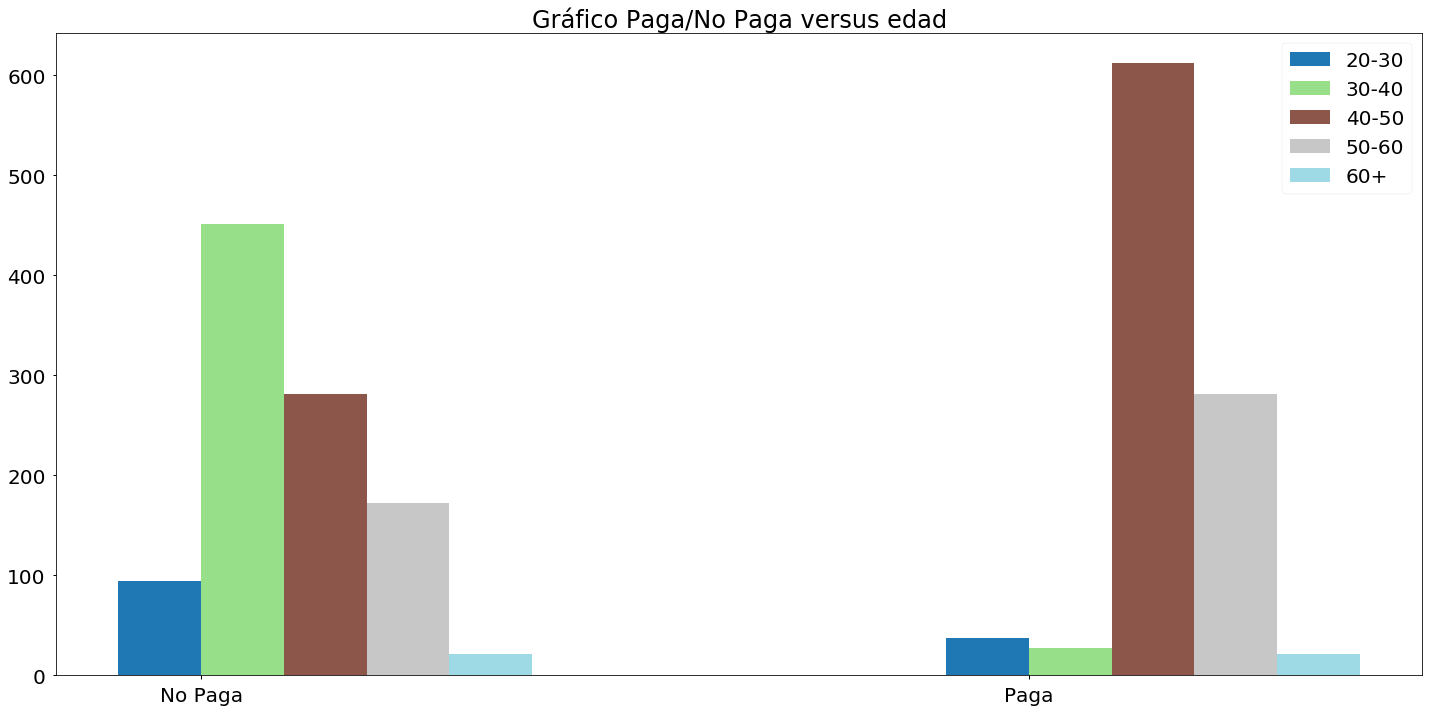

In [16]:
# Por edades
edades = features[:,2]
counts = [0]*5

# Fijar tramos de edad
edad_upper = [30, 40, 50, 60, 70]
edad_lower = [20, 30, 40, 50, 60]

for i in range(5):
    # Obtener etiquetas de personas que se encuentren dentro del rango etario
    indices_low = edad_lower[i]<edades
    indices_up = edades<edad_upper[i]
    indices = indices_low*indices_up
    
    unique, counts[i] = np.unique(labels[indices],
                                  return_counts=True)
graficar_categorico(2, 5, counts, ['20-30', '30-40', '40-50', '50-60', '60+'], 
                   "Gráfico Paga/No Paga versus edad", ('No Paga', 'Paga'), 0.1)

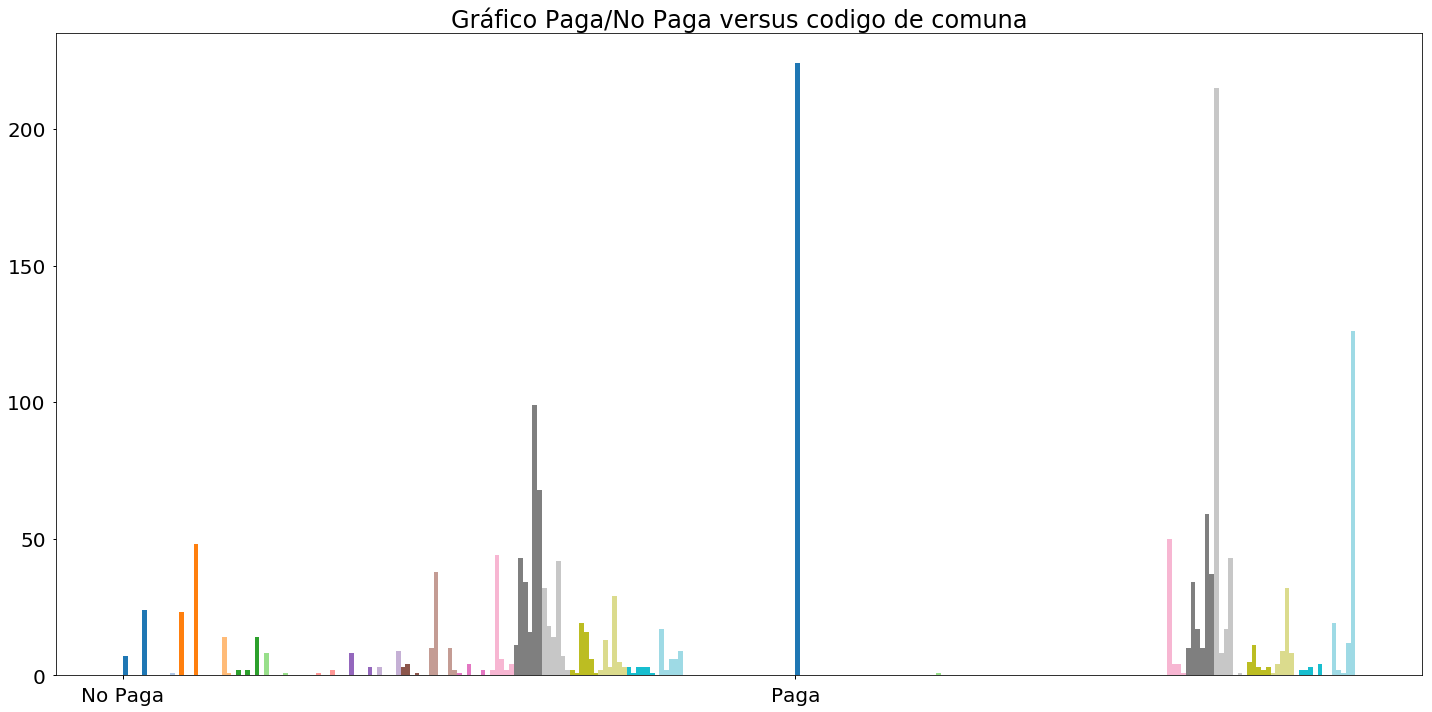

In [17]:
# Codigo de comuna
cod_comuna = features[:, 6]
counts = [0]*len(np.unique(cod_comuna))
plot_labels = ['']*len(np.unique(cod_comuna))
for i in range(len(np.unique(cod_comuna))):
    plot_labels[i] = str(np.unique(cod_comuna)[i])
    unique, aux_counts = np.unique(labels[cod_comuna==i], return_counts=True)
    if len(aux_counts) < 2:
        aux_counts = np.append(aux_counts, [0], axis=0)
        if len(aux_counts) < 2:
            aux_counts = np.append(aux_counts, [0], axis=0)
    counts[i] = aux_counts

graficar_categorico(2, len(np.unique(cod_comuna)), counts, plot_labels, 
                   "Gráfico Paga/No Paga versus codigo de comuna", ('No Paga', 'Paga'), 0.007, legend=False)

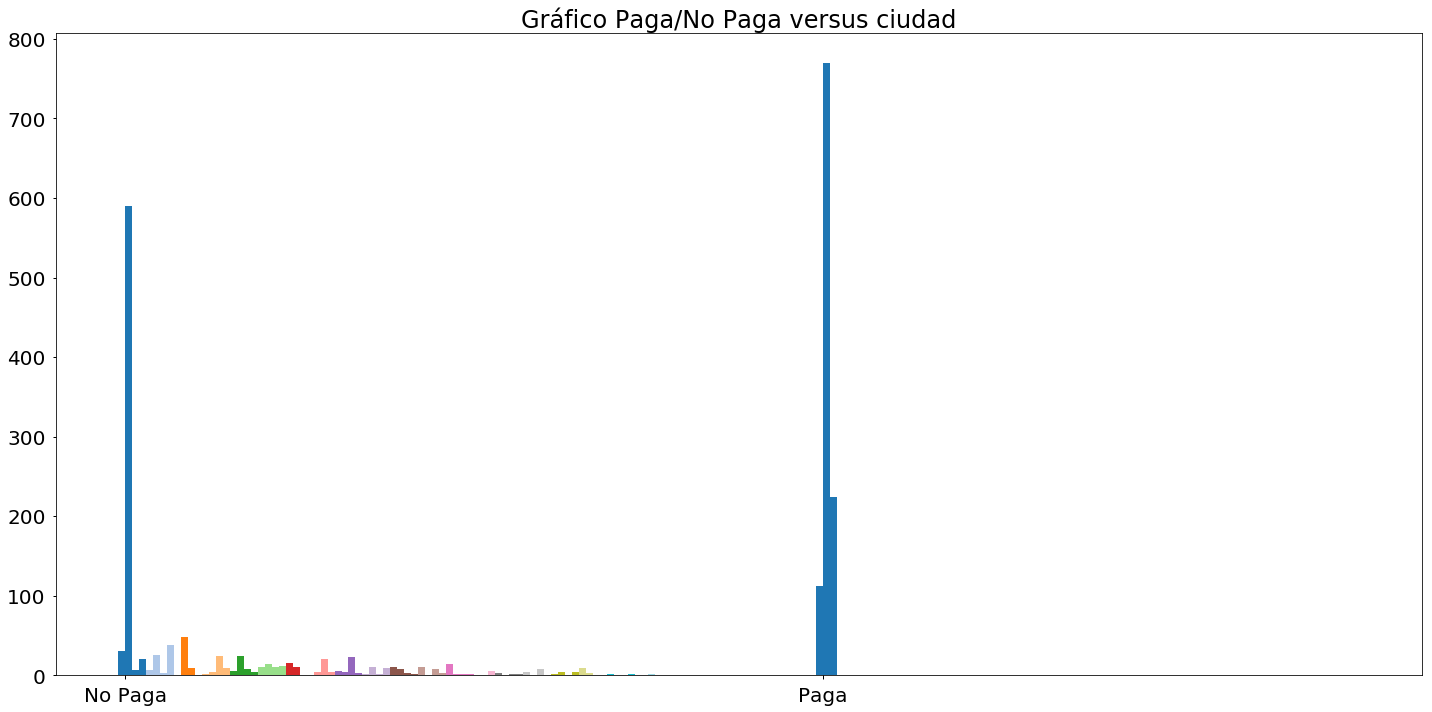

In [18]:
# Ciudad
ciudad = features[:, 7]
counts = [0]*len(np.unique(ciudad))
plot_labels = ['']*len(np.unique(ciudad))
for i in range(len(np.unique(ciudad))):
    plot_labels[i] = str(np.unique(ciudad)[i])
    unique, aux_counts = np.unique(labels[ciudad==i], return_counts=True)
    if len(aux_counts) < 2:
        aux_counts = np.append(aux_counts, [0], axis=0)
        if len(aux_counts) < 2:
            aux_counts = np.append(aux_counts, [0], axis=0)
    counts[i] = aux_counts

graficar_categorico(2, len(np.unique(ciudad)), counts, plot_labels, 
                   "Gráfico Paga/No Paga versus ciudad", ('No Paga', 'Paga'), 0.01, legend=False)

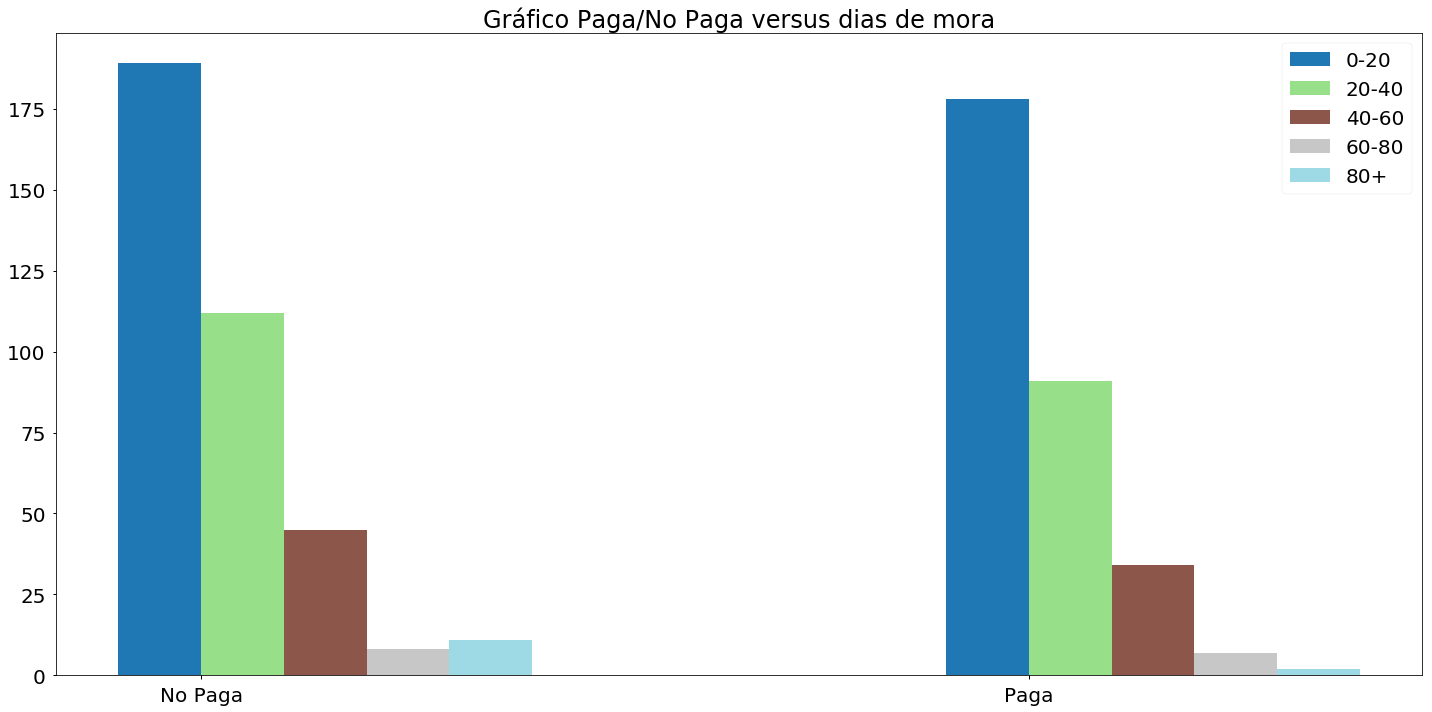

In [19]:
# Dias de mora
dias_mora = features[:, 13]
counts = [0]*5
dias_upper = [20, 40, 60, 80, 150]
dias_lower = [0, 20, 40, 60, 80]
for i in range(5):
    indices_low = dias_lower[i]<dias_mora
    indices_up = dias_mora<dias_upper[i]
    indices = indices_low*indices_up
    unique, counts[i] = np.unique(labels[indices],
                                  return_counts=True)
graficar_categorico(2, 5, counts, ['0-20', '20-40', '40-60', '60-80', '80+'], 
                   "Gráfico Paga/No Paga versus dias de mora", ('No Paga', 'Paga'), 0.1)

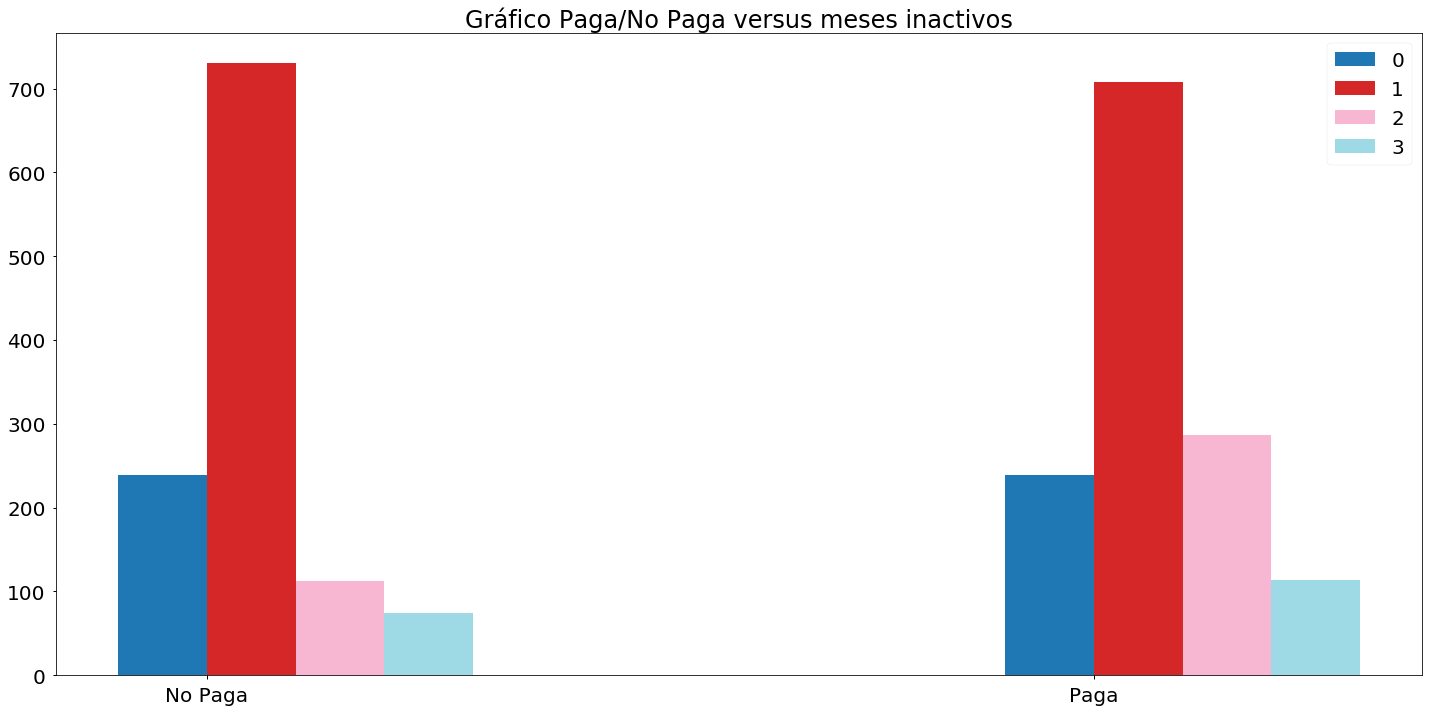

In [20]:
# Meses inactivos
meses_inact = features[:, 15]
counts = [0]*len(np.unique(meses_inact))
for i in range(len(np.unique(meses_inact))):
    unique, counts[i] = np.unique(labels[meses_inact==i],return_counts=True)
graficar_categorico(2, len(np.unique(meses_inact)), counts, ['0', '1', '2', '3'], 
                   "Gráfico Paga/No Paga versus meses inactivos", ('No Paga', 'Paga'), 0.1)

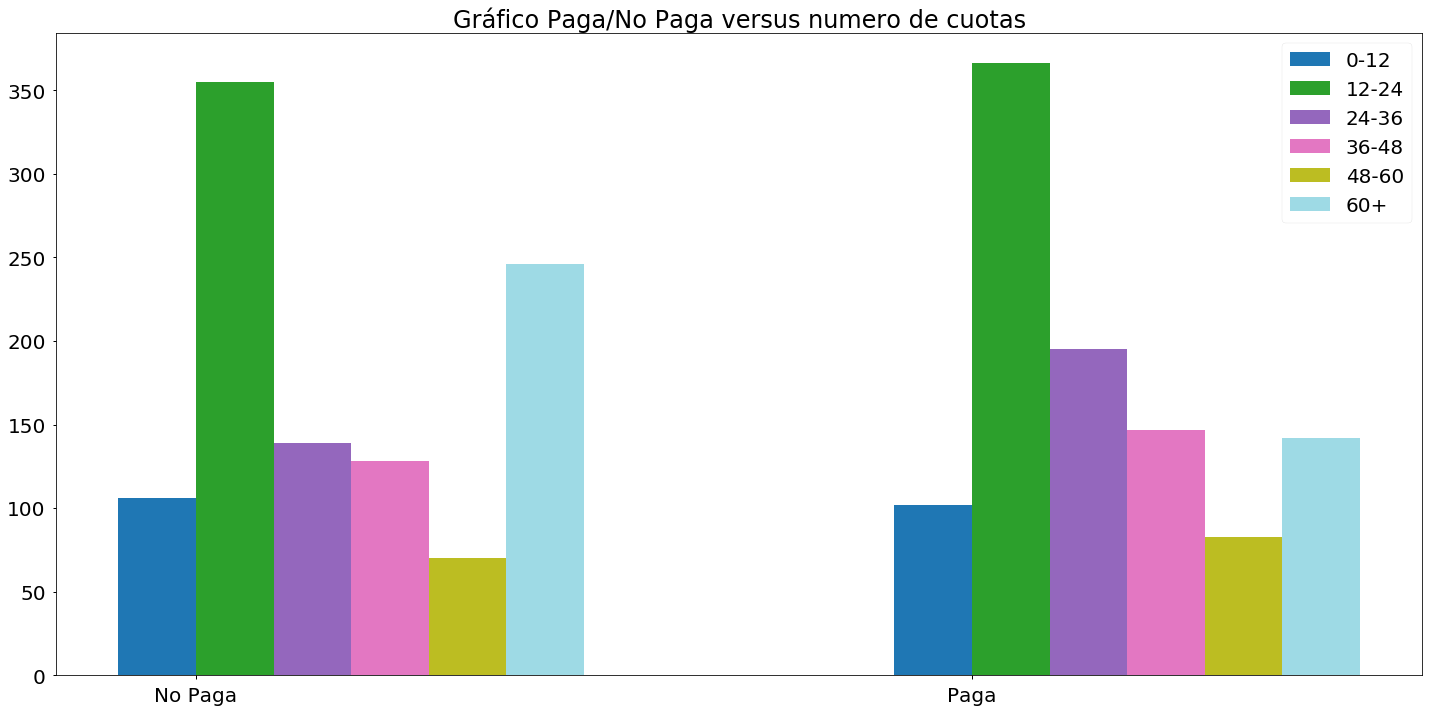

In [21]:
# Número de cuotas 
n_cuotas = features[:, 16]
counts = [0]*6

cuotas_upper = [12, 24, 36, 48, 60, 90]
cuotas_lower = [0, 12, 24, 36, 48, 60]

for i in range(6):
    indices_low = cuotas_lower[i]<n_cuotas
    indices_up = n_cuotas<cuotas_upper[i]
    indices = indices_low*indices_up
    unique, counts[i] = np.unique(labels[indices],
                                  return_counts=True)
graficar_categorico(2, 6, counts, ['0-12', '12-24', '24-36', '36-48', '48-60', '60+'], 
                   "Gráfico Paga/No Paga versus numero de cuotas", ('No Paga', 'Paga'), 0.1)

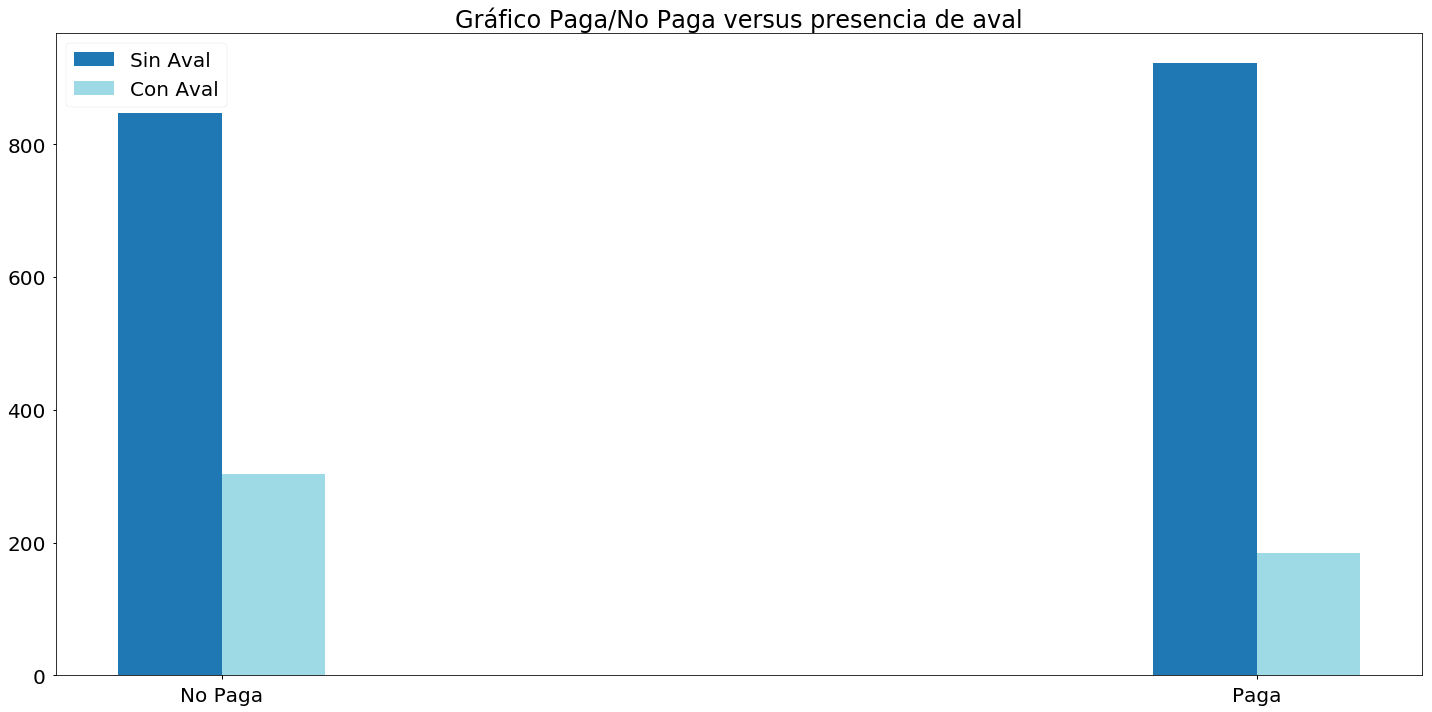

In [22]:
# Aval
est_civil = features[:, 17]
counts = [0]*2
for i in range(2):
    unique, counts[i] = np.unique(labels[est_civil==i], return_counts=True)
graficar_categorico(2, 2, counts, ['Sin Aval', 'Con Aval'], 
                   "Gráfico Paga/No Paga versus presencia de aval", ('No Paga', 'Paga'), 0.1)

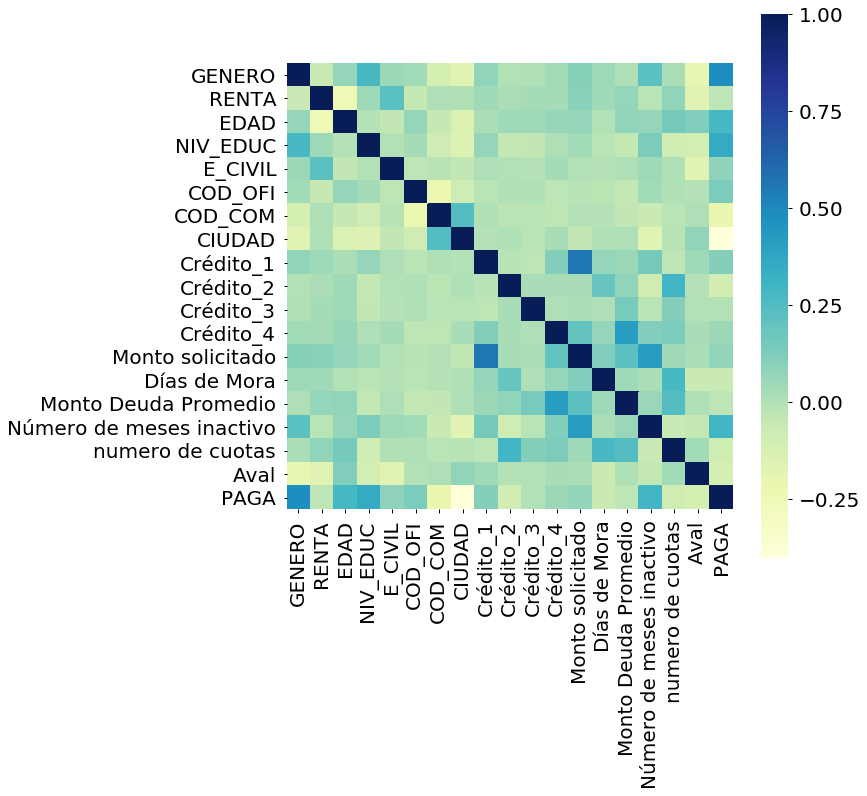

In [23]:
# Correlación entre las variables
plt.figure(figsize=(10,10))
sns.heatmap(raw_data.corr(), cmap=cm.YlGnBu, square=True)
plt.show()

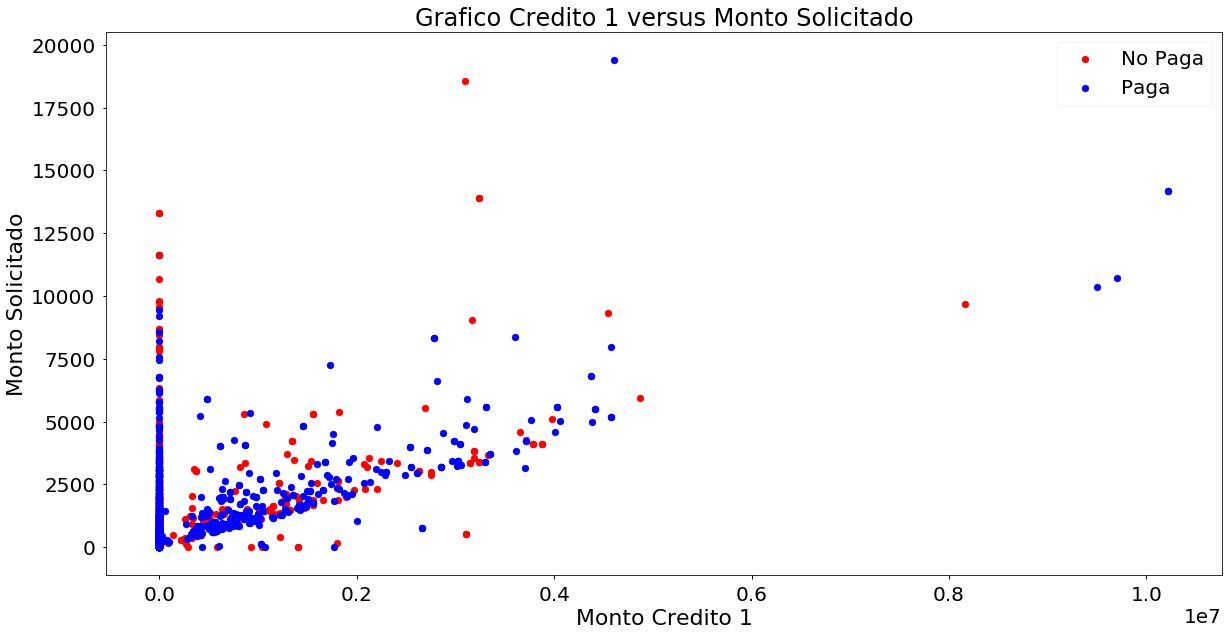

In [24]:
# Graficar Credito 1 v/s monto solicitado para ver si tienen un aporte significante
index_paga = labels == 1
index_no_paga = labels == 0

credito_1 = features[:,8]
solicitado = features[:,12]

plt.figure(figsize=(20,10))
plt.scatter(credito_1[index_no_paga], solicitado[index_no_paga], color='r', label='No Paga')
plt.scatter(credito_1[index_paga], solicitado[index_paga], color='b', label='Paga')
plt.title("Grafico Credito 1 versus Monto Solicitado")
plt.xlabel("Monto Credito 1")
plt.ylabel("Monto Solicitado")
plt.legend()
plt.show()


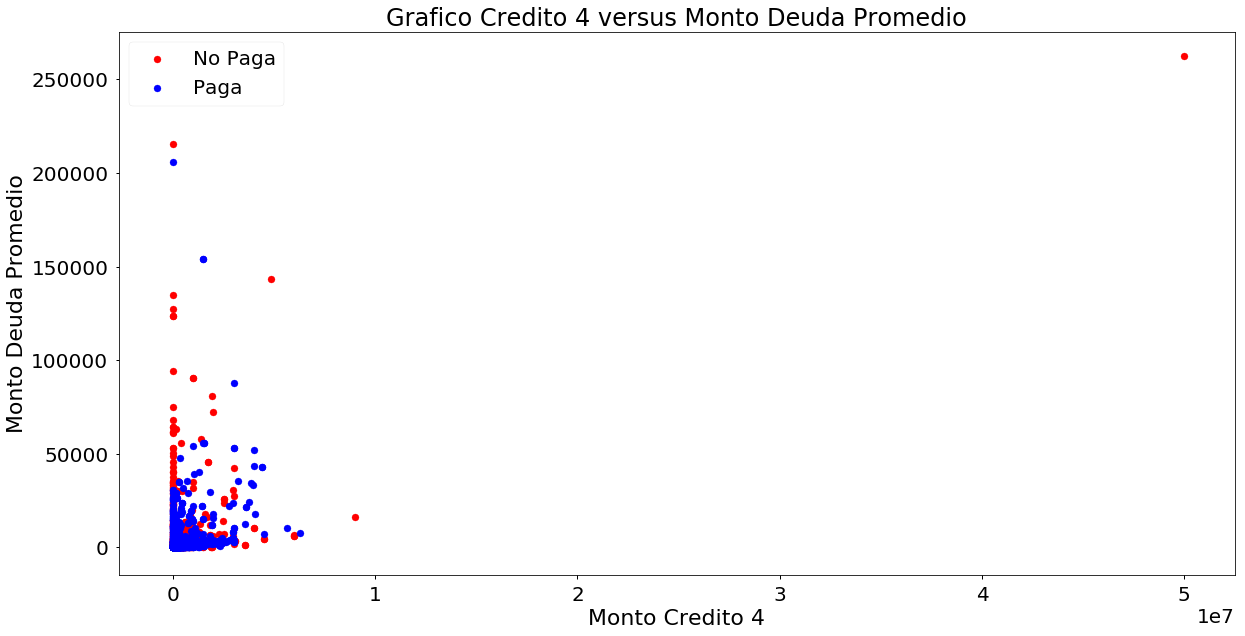

In [25]:
# Graficar Credito 4 v/s monto deuda promedio para ver si tienen un aporte significante
credito_4 = features[:,11]
deuda_prom = features[:,14]

plt.figure(figsize=(20,10))
ax = plt.gca()
ax.scatter(credito_4[index_no_paga], deuda_prom[index_no_paga], color='r', label='No Paga')
ax.scatter(credito_4[index_paga], deuda_prom[index_paga], color='b', label='Paga')
plt.title("Grafico Credito 4 versus Monto Deuda Promedio")
plt.xlabel("Monto Credito 4")
plt.ylabel("Monto Deuda Promedio")
plt.legend()
plt.show()

Finalmente, a través de este análisis se pueden obtener las siguientes conclusiones:
* La ciudad no sirve para realizar una buena predicción, ya que existen muchas ciudades con muy pocos datos, la mayoría siendo de personas que no pagan. Si incluimos esta característica, estas ciudades tendrian asociada una probabilidad muy cercana al 100% de no pagar su crédito, lo cual no sería correcto ya que este fenómeno se debe a la poca cantidad de datos
* Dado que el código de comuna se encuentra medianamente correlacionado a la ciudad (lo cual es de esperarse), tampoco aportará información buena, por lo que también se eliminará
* Se eliminará el monto solicitado debido a que la mayoría de su información se encuentra contenido dentro de los créditos (especialmente el primero y el cuarto), y el número de meses inactivo
* Debido a su poca significancia en los gráficos obtenidos, se eliminarán las columnas de número de cuotas, días de mora, y aval
* A partir de la matriz de correlación, se podría argumentar que el parámetro de deuda promedio tampoco tiene mucha relevancia, por lo que se probará retirándolo

In [26]:
trimmed_data = raw_data.drop(columns=['CIUDAD', 'PAGA', 'COD_COM','Monto solicitado',
                                      'numero de cuotas', 'Días de Mora', 'Aval', 'Monto Deuda Promedio'])

trimmed_data['GENERO'].replace(-1, np.nan, inplace=True, )
trimmed_data['E_CIVIL'].replace(-1, np.nan, inplace=True, )
trimmed_data['COD_OFI'].replace(-1, np.nan, inplace=True, )
trimmed_data['Número de meses inactivo'].fillna(-1, inplace=True, )


trimmed_data.head()

,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,Crédito_1,Crédito_2,Crédito_3,Crédito_4,Número de meses inactivo
0,0.0,463000.0,55.0,1,1.0,27,0,-4030,0.0,292673,1
1,0.0,1200000.0,59.0,1,1.0,121,0,0,27797549.0,0,1
2,0.0,526000.0,49.0,2,2.0,59,0,750000,0.0,0,0
3,1.0,1500000.0,47.0,4,2.0,138,0,976444,0.0,0,1
4,1.0,2600000.0,41.0,4,1.0,60,0,115440,0.0,4500000,3


### Paso 5: Transformar a _one-hot encoding_
En el dataframe existen algunas variables categóricas que no presentan una relación de orden clara (genero, estado civil y código de oficina). Para mejorar la clasificación, se pasarán a variables one-hot

In [27]:
trimmed_data=pd.get_dummies(trimmed_data, columns=['GENERO','E_CIVIL'])
trimmed_data.head()

,RENTA,EDAD,NIV_EDUC,COD_OFI,Crédito_1,Crédito_2,Crédito_3,Crédito_4,Número de meses inactivo,GENERO_0.0,GENERO_1.0,E_CIVIL_0.0,E_CIVIL_1.0,E_CIVIL_2.0,E_CIVIL_3.0
0,463000.0,55.0,1,27,0,-4030,0.0,292673,1,1,0,0,1,0,0
1,1200000.0,59.0,1,121,0,0,27797549.0,0,1,1,0,0,1,0,0
2,526000.0,49.0,2,59,0,750000,0.0,0,0,1,0,0,0,1,0
3,1500000.0,47.0,4,138,0,976444,0.0,0,1,0,1,0,0,1,0
4,2600000.0,41.0,4,60,0,115440,0.0,4500000,3,0,1,0,1,0,0


In [28]:
# Guardar dataframe procesado a csv
trimmed_data.to_csv('CREDITRISK_TRIMMED.csv', index=False)